In [92]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, classification_report
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from scipy.stats import randint

import matplotlib.pyplot as plt
import seaborn as sns

In [93]:
csv_file_path = '/Users/lucanozzoli/UTFPR/sistemas_inteligentes/Sistemas-Inteligentes-ML/treino_sinais_vitais_com_label.csv'
data = pd.read_csv(csv_file_path,
                   names=['id', 
                          'pSist', 
                          'pDiast', 
                          'qPA', 
                          'pulso', 
                          'resp', 
                          'gravid', 
                          'classe'])
data

,id,pSist,pDiast,qPA,pulso,resp,gravid,classe
0,1,13.592433,12.220855,8.416754,75.921057,21.635259,40.000000,2
1,2,15.775386,13.586879,8.725890,63.813564,19.718734,41.530427,2
2,3,3.649369,1.904802,0.000000,197.210213,19.045471,52.730745,3
3,4,17.264362,13.700638,8.733333,143.636181,17.621141,34.679911,2
4,5,12.705183,9.485389,1.747626,82.636672,12.209535,69.375882,3
...,...,...,...,...,...,...,...,...
1495,1496,17.151411,6.020803,4.774128,6.701052,7.380529,24.494467,1
1496,1497,13.114511,12.500453,8.400144,81.203081,13.630509,65.385011,3
1497,1498,17.976320,6.054430,4.768427,143.261527,21.843486,24.530704,1
1498,1499,12.640997,5.852639,1.707746,184.267283,14.256125,61.062546,3


In [94]:
#Data cleaning

clean_data = data.drop(['id', 
                       'pSist', 
                       'pDiast'],axis=1)

In [95]:
clean_data

,qPA,pulso,resp,gravid,classe
0,8.416754,75.921057,21.635259,40.000000,2
1,8.725890,63.813564,19.718734,41.530427,2
2,0.000000,197.210213,19.045471,52.730745,3
3,8.733333,143.636181,17.621141,34.679911,2
4,1.747626,82.636672,12.209535,69.375882,3
...,...,...,...,...,...
1495,4.774128,6.701052,7.380529,24.494467,1
1496,8.400144,81.203081,13.630509,65.385011,3
1497,4.768427,143.261527,21.843486,24.530704,1
1498,1.707746,184.267283,14.256125,61.062546,3


In [96]:
# Separate features (X) and target (y)
X = clean_data.drop(['gravid','classe'], axis=1)  # Replace 'target_column' with your target column
y = clean_data['classe']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [97]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)


RandomForestClassifier()

In [98]:
y_pred = rf.predict(X_test)


In [99]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)

Accuracy: 0.9333333333333333
Precision: 0.9557143896406227
Recall: 0.9021710237385295


In [100]:
# Create the confusion matrix
cm = confusion_matrix(y_test, y_pred)

print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           1       1.00      0.91      0.95        46
           2       0.94      0.95      0.94       171
           3       0.89      0.91      0.90        77
           4       1.00      0.83      0.91         6

    accuracy                           0.93       300
   macro avg       0.96      0.90      0.93       300
weighted avg       0.93      0.93      0.93       300



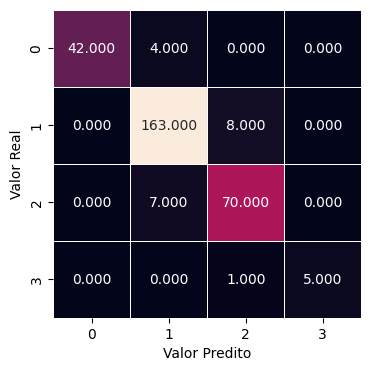

In [101]:
plt.figure(figsize=(4, 4))
sns.heatmap(cm, annot=True, fmt='0.3f', linewidths=0.5, square=True, cbar=False)
plt.ylabel('Valor Real')
plt.xlabel('Valor Predito')
plt.show()